## Importing libraries

In [1]:
# Importing frequently used libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For machine learning and neural networks
import pickle  # For serializing and de-serializing Python object structures
from tensorflow import keras  # For neural networks
from tensorflow.keras.models import Sequential, Model, load_model  # For sequential and functional API models
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, InputLayer  # For different types of layers in a neural network
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer
from tensorflow.keras.metrics import categorical_crossentropy, MeanSquaredError  # For different types of loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
from tensorflow.keras.datasets import cifar100  # CIFAR-100 dataset
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.model_selection import KFold  # For K-Fold cross validation
import itertools  # For creating iterators for efficient looping
import os  # For interacting with the OS
import shutil  # For high-level file operations
import torch  # PyTorch library for machine learning
import random  # For generating random numbers
import glob  # For finding all the pathnames matching a specified pattern
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import warnings  # For warning control
import tensorflow.keras.applications.efficientnet as efn  # For EfficientNet model
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings
%matplotlib inline  # For inline backend

UsageError: unrecognized arguments: # For inline backend


## Importing data

In [2]:
# Setting the working directory to the location of the datasets
os.chdir(r'C:\Users\RezaHardMan\Documents\Python projects\datasets\digits')

# Reading the training dataset from a CSV file
dt_train = pd.read_csv('train.csv')

# Reading the testing dataset from a CSV file
dt_test = pd.read_csv('test.csv')

# Reading the sample submission dataset from a CSV file
dt_sample = pd.read_csv('sample_submission.csv')

# Converting the training dataset into a DataFrame for easier manipulation
df_train = pd.DataFrame(dt_train)

# Converting the testing dataset into a DataFrame for easier manipulation
df_test = pd.DataFrame(dt_test)

# Converting the sample submission dataset into a DataFrame for easier manipulation
df_sample = pd.DataFrame(dt_sample)


In [3]:
# Displaying info of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# Displaying the first 20 rows of the testing dataset
dt_test.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Preparing the training data
# Dropping the 'label' column from the training data as it is the target variable
X_train = dt_train.drop('label', axis=1)

# The test data is already prepared and doesn't need to be changed
X_test = dt_test

# Extracting the 'label' column from the training and testing data to create the target variable
y_train = dt_train['label']
y_test = dt_sample['Label']

In [6]:
# Reshaping the training data to fit the model
# The '-1' in reshape function is used when you aren't sure about the dimension and you want numpy to calculate it for you
# Here we are reshaping a 2D array into a 3D array
X_train = X_train.values.reshape(-1,28,28,1)

# Reshaping the testing data to fit the model
X_test = X_test.values.reshape(-1,28,28,1)

# Converting the target variable into categorical variables
# 'num_classes = 10' indicates that there are 10 classes in the target variable
y_train = to_categorical(y_train, num_classes = 10)

## Data augmentation

In [7]:
# Creating an instance of ImageDataGenerator
datagen = ImageDataGenerator(
        # Boolean. Set input mean to 0 over the dataset, feature-wise
        featurewise_center=True,  
        
        # Boolean. Set each sample mean to 0
        samplewise_center=True,  
        
        # Boolean. Divide inputs by std of the dataset, feature-wise
        featurewise_std_normalization=True,  
        
        # Boolean. Divide each input by its std
        samplewise_std_normalization=True,   
        
        # Int. Degree range for random rotations
        rotation_range=10,  
        
        # Float. Range for random zoom
        zoom_range = 0.1,
        
        # Float (fraction of total width). Range for random horizontal shifts
        width_shift_range=0.1,  
        
        # Float (fraction of total height). Range for random vertical shifts
        height_shift_range=0.1,
        
        # Float. Fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.1
)

## Training data with my semi-simple Model.

In [8]:
from keras.callbacks import ModelCheckpoint

# Defining the model architecture
model2 = Sequential([
    # First convolutional layer with 32 filters of size 5x5, ReLU activation function, same padding and input shape of 28x28x1
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(28,28,1)),
    
    # Second convolutional layer with 32 filters of size 5x5, ReLU activation function and same padding
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same'),
    
    # Batch normalization layer to normalize the activations of the previous layer
    BatchNormalization(),
    
    # Max pooling layer with pool size of 2x2 to reduce the spatial dimensions of the output volume
    MaxPool2D(pool_size=(2, 2)),
    
    # Repeat the same for more layers with different parameters
    # ...
    
    # Flatten layer to convert the 3D outputs to 1D vector
    Flatten(),
    
    # Fully connected layer with 1024 neurons and ReLU activation function
    Dense(1024, activation = 'relu'),
    
    # Dropout layer with dropout rate of 0.5 to prevent overfitting
    Dropout(0.5),
    
    # Output layer with 10 neurons (one for each class) and softmax activation function for multi-class classification
    Dense(units=10, activation='softmax')
])

# Printing the summary of the model
print(model2.summary())

# Compiling the model with Adam optimizer, categorical crossentropy loss function and accuracy as the evaluation metric
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Defining the filepaths for saving the weights
filepath1="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath2 = "best_weights.hdf5"

# Defining the checkpoint callbacks for saving the best weights
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# List of callbacks
callbacks_list = [checkpoint1,checkpoint2]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 1024)              6

In [9]:
# Calculating the number of steps per epoch for training
# This is done by dividing the number of training samples (90% of total) by the batch size and rounding up
TRAIN_STEPS_PER_EPOCH = np.ceil((len(X_train)*0.9/32))

# Calculating the number of steps per epoch for validation
# This is done by dividing the number of validation samples (10% of total) by the batch size and rounding up
VAL_STEPS_PER_EPOCH = np.ceil((len(X_train)*0.1/8))

# Fitting the model to the data using the ImageDataGenerator
# The 'subset' parameter in datagen.flow allows us to specify which subset of the data to use (training or validation)
history = model2.fit(datagen.flow(X_train, y_train, batch_size=32, subset='training'),
                     validation_data=datagen.flow(X_train, y_train, batch_size=8, subset='validation'),
                     steps_per_epoch = TRAIN_STEPS_PER_EPOCH,
                     validation_steps = VAL_STEPS_PER_EPOCH,
                     epochs = 30, verbose=1, shuffle=True, 
                     callbacks=callbacks_list)


C:\Users\RezaHardMan\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\RezaHardMan\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
1177/1182 [============================>.] - ETA: 0s - loss: 0.3807 - accuracy: 0.8808
Epoch 00001: val_accuracy improved from -inf to 0.96071, saving model to weights-improvement-01-0.96.hdf5

Epoch 00001: val_accuracy improved from -inf to 0.96071, saving model to best_weights.hdf5
1182/1182 [==============================] - 13s 7ms/step - loss: 0.3798 - accuracy: 0.8810 - val_loss: 0.1296 - val_accuracy: 0.9607
Epoch 2/30
1178/1182 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9577
Epoch 00002: val_accuracy improved from 0.96071 to 0.97476, saving model to weights-improvement-02-0.97.hdf5

Epoch 00002: val_accuracy improved from 0.96071 to 0.97476, saving model to best_weights.hdf5
1182/1182 [==============================] - 10s 8ms/step - loss: 0.1351 - accuracy: 0.9577 - val_loss: 0.0728 - val_accuracy: 0.9748
Epoch 3/30
1180/1182 [============================>.] - ETA: 0s - loss: 0.0987 - accuracy: 0.9688
Epoch 00003: val_accuracy improved f

Epoch 22/30
1178/1182 [============================>.] - ETA: 0s - loss: 0.0269 - accuracy: 0.9914
Epoch 00022: val_accuracy did not improve from 0.99190

Epoch 00022: val_accuracy did not improve from 0.99190
1182/1182 [==============================] - 13s 11ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0293 - val_accuracy: 0.9917
Epoch 23/30
1179/1182 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9920
Epoch 00023: val_accuracy did not improve from 0.99190

Epoch 00023: val_accuracy did not improve from 0.99190
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 24/30
1181/1182 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9919
Epoch 00024: val_accuracy did not improve from 0.99190

Epoch 00024: val_accuracy did not improve from 0.99190
1182/1182 [==============================] - 13s 11ms/step - loss: 0.0253 - accuracy: 0.9919 - val_l

[[2411 2880 2866 2798 2477 2506 2811 2832 3783 2636]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


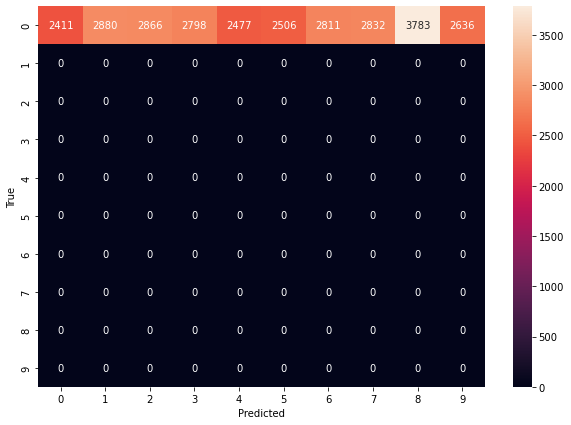

In [10]:
# Get the model's predictions on the test data
y_pred = model2.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Import the required function
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# It has been observed that all the labels in the sample are 0. Therefore, it is not feasible to evaluate our model using this test data.